# Machine Learning Sederhana


### 1. import library yang di perlukan


In [26]:
%matplotlib widget

import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

### 2. generate data


In [27]:
jumlah_data = 100
rasioForTen = 10 / jumlah_data

x = np.array([(i * rasioForTen) for i in range(jumlah_data)])
y = np.array([(i * rasioForTen) + (np.random.rand()) for i in range(jumlah_data)])

# development
# print({
#     'rasioForTen': rasioForTen,
#     'x': x,
#     'y': y,
# })
# fig, ax = plt.subplots()
# ax.spines['bottom'].set_position(('data',0))
# plt.scatter(x,y)
# plt.axis([0,10,0,10])
# plt.show()
# development

### 3. membuat fungsi yang dibutuhkan


In [28]:
def linearRegression(m,x):
    return (m * x)

# developement
# print(linearRegression(2,2))
# developement

### 4. menghitung prediksi


In [ ]:
m_awal = 5 # m_awal disini sengaja di set salah, jadi biarkan code yang menyelesaikanya
m_prediksi = m_awal
x_prediksi = np.array([0,10])
y_prediksi = linearRegression(x_prediksi,m_prediksi)

# development
# print({
#     'm_prediksi': m_prediksi,
#     'x_prediksi': x_prediksi,
#     'y_prediksi': y_prediksi,
# })
# raise SystemExit
# development


result_list_prediksi = []
m_list_prediksi = []
x_list_prediksi = []
y_list_prediksi = []
learning_rate = 0.1

for i in range(1, jumlah_data):
    y_prediksi = linearRegression(x[i],m_prediksi)
    y_actual = y[i]
    
    error = (y_actual - y_prediksi) * learning_rate
    delta_m = error / x[i]
    m_prediksi += delta_m

    m_list_prediksi.append(m_prediksi)
    x_list_prediksi.append(x_prediksi)
    y_list_prediksi.append(linearRegression(x_prediksi,m_prediksi))

    result_list_prediksi.append({
        'awal': {
            'm_awal': m_awal,
            'x_awal': round(x[i]),
            'y_awal': round(y[i],3),
        },
        'prediksi': {
            'm_prediksi': round(m_prediksi,3),
            'x_prediksi': round(x_prediksi.tolist()[-1],2),
            'y_prediksi': round(linearRegression(x_prediksi,m_prediksi).tolist()[-1],2),
        },
        'result': {
            'error': round(error,3),
        }
    })

# development
hasil_json = {
    'prediksi': result_list_prediksi
}
with open('../Json/data.json','w') as f:
    json.dump(hasil_json,f,indent=4)
# development


### 5. Visualisasi Prediksi

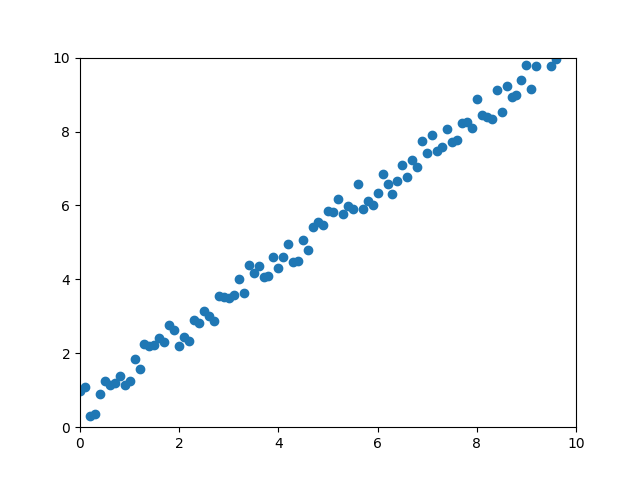

In [30]:
fig, ax = plt.subplots()
line, = plt.plot([],[],"r")

plt.scatter(x,y)
ax.axis([0,10,0,10])
text = ax.text(1,10.2,"")

def animate(frame):
    x_pred = x_list_prediksi[frame]
    y_pred = y_list_prediksi[frame]
    line.set_data(x_pred, y_pred)
    return line,

anim = FuncAnimation(
    fig=fig,
    func=animate,
    frames=jumlah_data,
    interval=100,
    repeat=False
)

plt.show()